In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import cv2
import numpy as np
import shap
import json

In [5]:
model = load_model('Resnet50v2_Cat_Dog_Epoch_100_Batch_16.h5')
class_names = ['cat', 'dog']
image = cv2.imread("archive/test_set/dogs/dog.4011.jpg")
image1 = cv2.imread("archive/test_set/dogs/dog.4001.jpg")
image2 = cv2.imread("archive/test_set/dogs/dog.4002.jpg")
# print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
#cv讀照片，顏色莫認為BGR，需轉為RGB，錯誤表示黑白或已轉
image = cv2.resize(image, (224, 224))
image1 =  cv2.resize(image1, (224, 224))
image2 =  cv2.resize(image2, (224, 224))
image = np.expand_dims(image, axis = 0)
image1 = np.expand_dims(image1, axis = 0)
image2 = np.expand_dims(image2, axis = 0)



2022-12-22 15:00:18.581710: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
n = np.concatenate([image, image1])
n = np.concatenate([n, image2])
n  = n / 255.0

print(n.shape)

(3, 224, 224, 3)


In [14]:
print(np.argmax(model.predict(n), axis=1))
print(model.predict(n))

1/1 [==============================] - 0s 206ms/step
[1 0 1]
1/1 [==============================] - 0s 228ms/step
[[0.26074517 0.7392548 ]
 [0.5375502  0.4624498 ]
 [0.28629538 0.71370465]]


In [60]:
masker = shap.maskers.Image("inpaint_telea", n[0].shape)
explainer = shap.Explainer(model, masker, output_names = class_names)

shap_values = explainer(n[0:1], 
                        max_evals=300, 
                        batch_size=30,
                        outputs=shap.Explanation.argsort.flip[:2])

Partition explainer: 2it [00:32, 32.20s/it]                                     


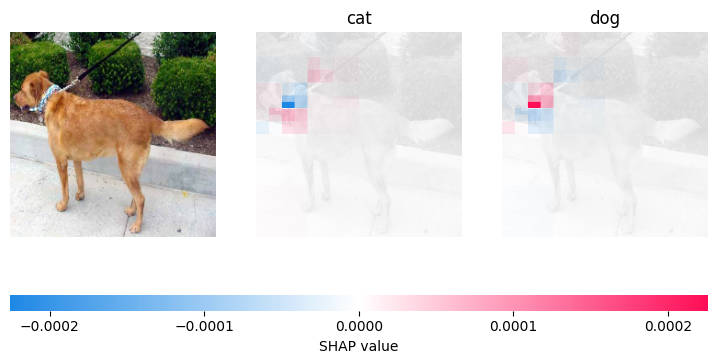

In [61]:
shap.image_plot(shap_values)

In [62]:
interested_array = np.zeros((224, 224))
print(interested_array.shape)

(224, 224)


In [65]:
print(shap_values.values[0].shape)
cat_count = 0
dog_count = 0
# print(len(shap_values.values[0][0][0]))
for i in range(224):
    for j in range(224):
        print(shap_values.values[0][i][j][0][0])
        if shap_values.values[0][i][j][0][1] < 0:
            cat_count = cat_count + 1
        else :
            interested_array[i][j] = 1
            dog_count = dog_count + 1
print(cat_count)
print(dog_count)
        
# print(shap_values.values[0][223][223][0])
# print(shap_values.values)

(224, 224, 3, 2)
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.798167141167079e-07
-8.79816714116707

1.0573995762130844e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130844e-07
1.0573995762130844e-07
1.0573995762130844e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130844e-07
1.0573995762130844e-07
1.0573995762130844e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130844e-07
1.0573995762130844e-07
1.0573995762130844e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130844e-07
1.0573995762130844e-07
1.0573995762130844e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130844e-07
1.0573995762130844e-07
1.0573995762130844e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130842e-07
1.0573995762130844e-07
1.0573995762130844e-07
1.0573995762130844e-07
1.057399576

In [64]:
print(interested_array)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [81]:
vali_array = np.zeros((224, 224), "uint8")

In [82]:
dog = cv2.imread('label.png', cv2.IMREAD_GRAYSCALE)
dog = cv2.resize(dog, (224, 224))

In [83]:
img_org_monkry_np = np.logical_or(dog,vali_array)

vali_array[img_org_monkry_np == True] = 1
vali_array[img_org_monkry_np == False] = 0

org_monkey_mask = vali_array


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [89]:
a = np.logical_and(interested_array, org_monkey_mask)
vali_array_count = 0
a_count = 0

for i in range(224):
    for j in range(224):
        if a[i][j] == True:
            a_count = a_count + 1
        if vali_array[i][j] == 1:
            vali_array_count = vali_array_count + 1
            
print(a_count)
print(vali_array_count)

overlapped = a_count / vali_array_count

print(overlapped)

6354
12762
0.4978843441466855
